In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


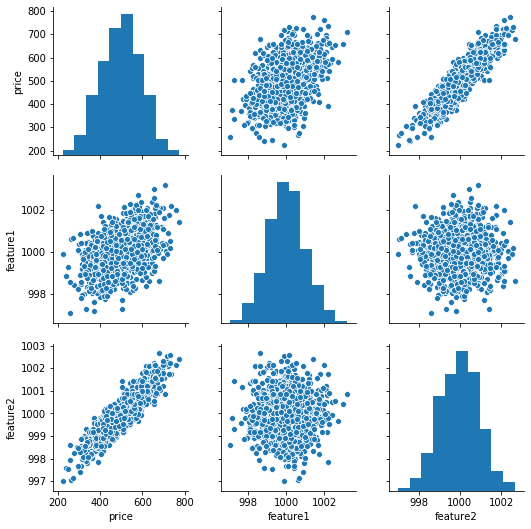

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
print(df.head())
X = df[['feature1','feature2']].values
X

        price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531


array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [7]:
y = df['price'].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.min()

0.0

In [18]:
X_train.max()

1.0

In [19]:
# Part 2 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#help(Sequential)
#help(Dense)

In [45]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [46]:
model.fit(x=X_train, y=y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256644.4473
Epoch 2/250
700/700 [==============================] - 0s 69us/sample - loss: 256515.9565
Epoch 3/250
700/700 [==============================] - 0s 66us/sample - loss: 256330.7752
Epoch 4/250
700/700 [==============================] - 0s 73us/sample - loss: 256112.4675
Epoch 5/250
700/700 [==============================] - 0s 68us/sample - loss: 255871.4290
Epoch 6/250
700/700 [==============================] - 0s 71us/sample - loss: 255604.0271
Epoch 7/250
700/700 [==============================] - 0s 72us/sample - loss: 255313.9984
Epoch 8/250
700/700 [==============================] - 0s 69us/sample - loss: 254997.5123
Epoch 9/250
700/700 [==============================] - 0s 74us/sample - loss: 254636.7931
Epoch 10/250
700/700 [==============================] - 0s 69us/sample - loss: 254230.0061
Epoch 11/250
700/700 [==============================] - 0s 68us/sample - loss: 

700/700 [==============================] - 0s 70us/sample - loss: 1232.9527
Epoch 92/250
700/700 [==============================] - 0s 68us/sample - loss: 1201.8310
Epoch 93/250
700/700 [==============================] - 0s 65us/sample - loss: 1175.2880
Epoch 94/250
700/700 [==============================] - 0s 63us/sample - loss: 1146.3031
Epoch 95/250
700/700 [==============================] - 0s 64us/sample - loss: 1119.8639
Epoch 96/250
700/700 [==============================] - 0s 63us/sample - loss: 1092.7211
Epoch 97/250
700/700 [==============================] - 0s 61us/sample - loss: 1067.6916
Epoch 98/250
700/700 [==============================] - 0s 63us/sample - loss: 1044.6900
Epoch 99/250
700/700 [==============================] - 0s 64us/sample - loss: 1020.2237
Epoch 100/250
700/700 [==============================] - 0s 63us/sample - loss: 994.3266
Epoch 101/250
700/700 [==============================] - 0s 62us/sample - loss: 971.6345
Epoch 102/250
700/700 [===========

700/700 [==============================] - 0s 64us/sample - loss: 25.0571
Epoch 184/250
700/700 [==============================] - 0s 64us/sample - loss: 24.9560
Epoch 185/250
700/700 [==============================] - 0s 66us/sample - loss: 24.5949
Epoch 186/250
700/700 [==============================] - 0s 62us/sample - loss: 24.7289
Epoch 187/250
700/700 [==============================] - 0s 65us/sample - loss: 24.6631
Epoch 188/250
700/700 [==============================] - 0s 63us/sample - loss: 24.1523
Epoch 189/250
700/700 [==============================] - 0s 64us/sample - loss: 24.6029
Epoch 190/250
700/700 [==============================] - 0s 67us/sample - loss: 24.3662
Epoch 191/250
700/700 [==============================] - 0s 69us/sample - loss: 24.4777
Epoch 192/250
700/700 [==============================] - 0s 65us/sample - loss: 24.1448
Epoch 193/250
700/700 [==============================] - 0s 66us/sample - loss: 24.6510
Epoch 194/250
700/700 [=======================

In [47]:
loss_df = pd.DataFrame(model.history.history)

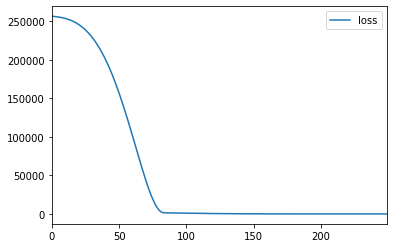

In [48]:
plot = loss_df.plot()

In [30]:
# Part 3 Evaluation

In [49]:
model.evaluate(X_test, y_test, verbose=0)

25.067589747111004

In [50]:
model.evaluate(X_train, y_train, verbose=0)

24.39141050066267

In [58]:
test_predictions = model.predict(X_test)

In [67]:
#test_predictions
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged ::

In [61]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      404.868500
1      622.970642
2      591.579468
3      571.702515
4      366.241821
          ...    
295    528.549072
296    514.785034
297    609.089844
298    416.516388
299    410.458557
Length: 300, dtype: float32

In [62]:
 pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [63]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [69]:
pred_df.columns=['Test True Y','Model Predictions']

In [70]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.868500
1,624.156198,622.970642
2,582.455066,591.579468
3,578.588606,571.702515
4,371.224104,366.241821
...,...,...
295,525.704657,528.549072
296,502.909473,514.785034
297,612.727910,609.089844
298,417.569725,416.516388


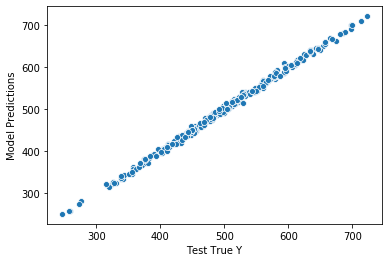

In [71]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [72]:
# regression evaluation error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.00864037451537

In [74]:
# This means average of $4.00 off from the prediction of price point (the mean price)

In [75]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [76]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [77]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.067593324603045

In [ ]:
# 25.067 is almost the same as the previously computed
# model.evaluate(X_test, y_test, verbose=0) 

In [79]:
# to compute the root mean squared error
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.0067547697688415

In [80]:
# what price should the new_gem be?
new_gem = [[998,1000]]

In [89]:
new_gem = scaler.transform(new_gem)

In [90]:
model.predict(new_gem)

array([[340.10318]], dtype=float32)

In [91]:
# saving the model
from tensorflow.keras.models import load_model

In [92]:
model.save('my_gem_model.h5')

In [93]:
later_model = load_model('my_gem_model.h5')

In [94]:
later_model.predict(new_gem)

array([[340.10318]], dtype=float32)